# Brazilian E-Commerce  Olist Analysis


### Preprocessing 

#### 1. Import libraries for Data Cleaning

In [772]:
## import libraries 
import pandas as pd
import numpy as np

import datetime as dt   ## for datetime operations

import matplotlib.pyplot as plt     ## for visualizations
import seaborn as sns

#### 2. Loading the Dataset 

In [774]:
## importing dataset into dataframe 
df_customers = pd.read_csv(r"D:\Career\Data_Analytics\DA_Projects\E_Commerce_Datasets\Unclean_olist_dataset\olist_customers_dataset.csv")
df_orders = pd.read_csv(r"D:\Career\Data_Analytics\DA_Projects\E_commerce_Datasets\Unclean_olist_dataset\olist_orders_dataset.csv")
df_order_items = pd.read_csv(r"D:\Career\Data_Analytics\DA_Projects\E_commerce_Datasets\Unclean_olist_dataset\olist_order_items_dataset.csv")
df_order_payments =pd.read_csv(r"D:\Career\Data_Analytics\DA_Projects\E_commerce_Datasets\Unclean_olist_dataset\olist_order_payments_dataset.csv")
df_geolocation = pd.read_csv(r"D:\Career\Data_Analytics\DA_Projects\E_commerce_Datasets\Unclean_olist_dataset\olist_geolocation_dataset.csv")
df_products = pd.read_csv(r"D:\Career\Data_Analytics\DA_Projects\E_commerce_Datasets\Unclean_olist_dataset\olist_products_dataset.csv")
df_product_category_translation = pd.read_csv(r"D:\Career\Data_Analytics\DA_Projects\E_commerce_Datasets\Unclean_olist_dataset\product_category_name_translation.csv")
df_sellers = pd.read_csv(r"D:\Career\Data_Analytics\DA_Projects\E_commerce_Datasets\Unclean_olist_dataset\olist_sellers_dataset.csv")
df_reviews = pd.read_csv(r"D:\Career\Data_Analytics\DA_Projects\E_Commerce_Datasets\Unclean_olist_dataset\olist_order_reviews_dataset.csv")

#### 3. Initial Inspection of the Dataset

In [776]:
## organizing DataFrames into a dictionary
dataframes = {
    'Customers' : df_customers,
    'Orders' : df_orders,
    'Order Items' : df_order_items,
    'Order Payments' : df_order_payments,
    'Products' : df_products,
    'Geolocation' : df_geolocation,
    'Product Category Translation' : df_product_category_translation,
    'Sellers' : df_sellers,
    'Reviews' : df_reviews
}


## Iterating through a dictionary of dataframe to print each dataframe columns 
for df_name,df in dataframes.items():
    print(f'{df_name}')  # print name of the dataframe
    print(f'{list(df.columns)}\n')  # print columns names of the dataframe as a list

Customers
['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Orders
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Order Items
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Order Payments
['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Products
['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

Geolocation
['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Product Category Translation
['product_category_name', 'product_category_name_english']

Sellers
['seller_id', 'seller_zip_code_pre

In [778]:
## lets get the total number of rows and columns in each dataframe
for df_name , df in dataframes.items():
    print(f'{df_name} :- {df.shape}')
    print('-'*50)


Customers :- (99441, 5)
--------------------------------------------------
Orders :- (99441, 8)
--------------------------------------------------
Order Items :- (112650, 7)
--------------------------------------------------
Order Payments :- (103886, 5)
--------------------------------------------------
Products :- (32951, 9)
--------------------------------------------------
Geolocation :- (1000163, 5)
--------------------------------------------------
Product Category Translation :- (71, 2)
--------------------------------------------------
Sellers :- (3095, 4)
--------------------------------------------------
Reviews :- (99224, 7)
--------------------------------------------------


In [780]:
for df_name , df in dataframes.items():
    print(f'{df_name}\n')
    print(f'{df.dtypes}\n')
    print('*'*30)

Customers

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

******************************
Orders

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

******************************
Order Items

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

******************************
Order Payments

order_id                 object
payment_sequential        int64
payment_type             object
paymen

* After reviewing each dataframes columns data type 
* Some columns in **orders dataframe** have incorrect data type of object for date & timestamp , will change it to datetime 
* [order_purchase_timestamp ,order_approved_at ,order_delivered_carrier_date ,order_delivered_customer_date ,order_estimated_delivery_date ] 
* shipping_limit_date in **Order Items dataframe** has incorrect data type of object will change it to datetime.
* changing review_creation_date ,review_answer_timestamp to datetime as they have wrong data type

* each order_id is unique, we can directly link every order_id to a customer_unique_id (instead of customer_id) without losing the uniqueness of the order_id.
* Ensure Correct Customer-Order Mapping: By using customer_unique_id, which is a more specific and unique identifier, you ensure that each order is correctly associated with its customer.

In [782]:
# Merge the orders table with the customers table on 'customer_id' to get the 'customer_unique_id'
df_orders = df_orders.merge(
    df_customers[['customer_id', 'customer_unique_id']],
    on='customer_id',
    how='inner'
)

# Now, df_orders will have the 'customer_unique_id' mapped to each order
# we no longer need 'customer_id' in df_customers & df_orders, wew ill drop it
df_customers.drop(columns=['customer_id'], inplace=True)
df_orders.drop(columns = ['customer_id'],inplace = True)

In [784]:
df_orders.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6


#### 4. Setting right data types for columns and names to columns

In [786]:
## changing data types of columns with wrong data types

df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])  ## changes in order items dataframe

df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])  ## changes in order dataframe
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

df_reviews['review_creation_date'] = pd.to_datetime(df_reviews['review_creation_date'])  ## changes in reviews dataframe
df_reviews['review_answer_timestamp'] =  pd.to_datetime(df_reviews['review_answer_timestamp'])

print('orders Data types \n',df_orders.dtypes)  ## verify the changes
print('*'*50)
print('\norder items data types ',df_order_items.dtypes)
print('*'*50)
print('\norder items data types ',df_reviews.dtypes)

orders Data types 
 order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
customer_unique_id                       object
dtype: object
**************************************************

order items data types  order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object
**************************************************

order items data types  review_id                          object
order_id                           object
review_score                        int64
review_comment_title    

In [788]:
### state columns to state_code 
df_customers = df_customers.rename(columns={'customer_state':'customer_state_code'})
df_geolocation = df_geolocation.rename(columns = {'geolocation_state':'geolocation_state_code'})
df_sellers = df_sellers.rename(columns = {'seller_state' : 'seller_state_code'})

print(f'{df_customers.dtypes}\n')
print(f'{df_geolocation.dtypes}\n')
print(f'{df_sellers.dtypes}\n')

customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state_code         object
dtype: object

geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state_code          object
dtype: object

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state_code         object
dtype: object



In [790]:
#### Checking for duplicates and Removing them 
print("Number of Duplicates in Each Datframe\n")
for df_name ,df in dataframes.items():
    print(f'{df_name} Duplicates = {df.duplicated().sum()}')

Number of Duplicates in Each Datframe

Customers Duplicates = 3089
Orders Duplicates = 0
Order Items Duplicates = 0
Order Payments Duplicates = 0
Products Duplicates = 0
Geolocation Duplicates = 261831
Product Category Translation Duplicates = 0
Sellers Duplicates = 0
Reviews Duplicates = 0


In [792]:
## will drop duplicates in customers table
df_customers = df_customers.drop_duplicates()

## verify if duplicates are removed from dataset
print(f'Customers Dataframe duplicates Number :- {df_customers.duplicated().sum()}')

Customers Dataframe duplicates Number :- 0


In [794]:
## checking for duplicates in customer_id in customers 
print(df_customers['customer_unique_id'].duplicated().sum())

## we will drop these duplicates
df_customers = df_customers.drop_duplicates(subset=['customer_unique_id'], keep='first')


256


In [796]:
df_customers['customer_unique_id'].duplicated().sum()   ## verify changes

0

In [798]:
## checking for duplicated in orders table  order id column
df_orders['order_id'].duplicated().sum()

0

In [800]:
## reviewing the duplicates in df_geolocation dataframe 
df_geolocation[df_geolocation.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state_code
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [802]:
## will consider dropping duplicate rows as their are identical values in all columns of duplicate rows
df_geolocation = df_geolocation.drop_duplicates()

## verify if duplicates are removed from dataset
print(f'Geolocation Dataframe duplicates Number :- {df_geolocation.duplicated().sum()}')

Geolocation Dataframe duplicates Number :- 0


In [838]:
## checking for duplicate review_id
df_reviews['review_id'].duplicated().sum()

814

In [840]:
## dropping duplicate review id
df_reviews = df_reviews.drop_duplicates(subset = ['review_id'] , keep = 'first')


#### 6. Check for missing values and Treat missing values

In [804]:
for df_name,df in dataframes.items():
        print(f'Dataset {df_name}')
        print(f'{df.isna().sum()}\n')
        print("*"*50)

Dataset Customers
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**************************************************
Dataset Orders
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**************************************************
Dataset Order Items
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**************************************************
Dataset Order Payments
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0


* For our analysis review title and review message are not required so for our analysis so will drop them
* Order dataset has nulls for the columns :- 
     *  order_approved_at          -       160
     *  order_delivered_carrier_date  -   1783
     *  order_delivered_customer_date -   2965
* The missing values in orders table are valid because order approved & delivered updates are not there when it gets approved or delivered then respective columns will get updated
       
* Products Dataset has null for the columns :- 
   *  product_category_name     -    610
   * product_name_lenght         -  610
   * product_description_lenght   -  610
   * product_photos_qty            -  610
   * product_weight_g              -  2
   * product_length_cm             -  2
   * product_height_cm             -  2
   * product_width_cm               - 2
   * I will keep the nulls in products dataset as it is because these values are unknown and fill missing values in the product_category_name      column with 'unknown'

In [806]:
## removing review_comment_title ,review_comment_message from df_reviews 
df_reviews.drop(columns = ['review_comment_title' ,'review_comment_message'],axis = 1, inplace=True)

In [808]:
##fill any missing values in the product_category_name column with 'unknown'
df_products['product_category_name'] = df_products['product_category_name'].fillna('unknown')
df_products.isna().sum()  ## verify the changes 

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [810]:
#list to columns to check for null values
columns_to_check = ['order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date']

# group by order_status and count null values 
null_counts_by_status = df_orders.groupby('order_status')[columns_to_check].apply(lambda x: x.isnull().sum())
null_counts_by_status

,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
order_status,,,
approved,0,2,2
canceled,141,550,619
created,5,5,5
delivered,14,2,8
invoiced,0,314,314
processing,0,301,301
shipped,0,0,1107
unavailable,0,609,609


* **created, invoiced, processing, shipped:**
* Missing values in columns like order_approved_at, order_delivered_carrier_date will be left as is, as they represent orders in progress or yet to reach a particular stage.
* No imputation is required here since these values are expected to remain null until the order progresses further.
* **canceled:**
* Missing values will remain as is because the order is canceled, and these timestamps (like approval or delivery) are irrelevant.
* **Delivered**
* missing values in order_approved_at will be filled with order purchase date assuming the order was approves on the same day
* Rest missing values in **order_delivered_carrier_date , order_aproved_date** will be kept as it is , not required for our analysis
* **filling missing values in order_delivered_customer_date with order_estimated_delivery_date as this column will be used in analysis**

In [812]:
## treating missing values in df_orders dataset 
## treating missing values in order_approved_at  with same value in order_purchase_timestamp assuming order was approved on the same day of purchase
df_orders.loc[(df_orders['order_status'] == 'delivered') & (df_orders['order_approved_at'].isna()),'order_approved_at'] = df_orders['order_purchase_timestamp']

## will fill missing values in order_delivered_customer_date with order_estimated_delivery_date 
df_orders['order_delivered_customer_date'] = df_orders['order_delivered_customer_date'].fillna(df_orders['order_estimated_delivery_date'])

## will keep other columns missing values as it is , not required for our analysis
# Verify the changes to 'order_approved_at'
df_orders.isna().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1783
order_delivered_customer_date       0
order_estimated_delivery_date       0
customer_unique_id                  0
dtype: int64

##### mapping operation (state_code to state_name) , (portugese product names to english product name)

In [814]:
### updating data in state columns from abbreviations to full state name
# Mapping state abbreviations to state names
state_mapping = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapa',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceara',
    'DF': 'Distrito Federal',
    'ES': 'Espirito Santo',
    'GO': 'Goias',
    'MA': 'Maranhao',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Para',
    'PB': 'Paraiba',
    'PR': 'Parana',
    'PE': 'Pernambuco',
    'PI': 'Piaui',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondonia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'Sao Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}

# Replace abbreviations with full state names in each relevant column
df_customers['customer_state'] = df_customers['customer_state_code'].replace(state_mapping)
df_geolocation['geolocation_state'] = df_geolocation['geolocation_state_code'].replace(state_mapping)
df_sellers['sellers_state'] = df_sellers['seller_state_code'].replace(state_mapping)


In [816]:
print('Customers Dataframe \n',df_customers['customer_state'].unique(),'\n')
print('Geolocation Dataframe \n',df_geolocation['geolocation_state'].unique(),'\n')
print('Sellers Dataframe \n',df_sellers['sellers_state'].unique(),'\n')

Customers Dataframe 
 ['Sao Paulo' 'Santa Catarina' 'Minas Gerais' 'Parana' 'Rio de Janeiro'
 'Rio Grande do Sul' 'Para' 'Goias' 'Espirito Santo' 'Bahia' 'Maranhao'
 'Mato Grosso do Sul' 'Ceara' 'Distrito Federal' 'Rio Grande do Norte'
 'Pernambuco' 'Mato Grosso' 'Amazonas' 'Amapa' 'Alagoas' 'Rondonia'
 'Paraiba' 'Tocantins' 'Piaui' 'Acre' 'Sergipe' 'Roraima'] 

Geolocation Dataframe 
 ['Sao Paulo' 'Rio Grande do Norte' 'Acre' 'Rio de Janeiro'
 'Espirito Santo' 'Minas Gerais' 'Bahia' 'Sergipe' 'Pernambuco' 'Alagoas'
 'Paraiba' 'Ceara' 'Piaui' 'Maranhao' 'Para' 'Amapa' 'Amazonas' 'Roraima'
 'Distrito Federal' 'Goias' 'Rondonia' 'Tocantins' 'Mato Grosso'
 'Mato Grosso do Sul' 'Rio Grande do Sul' 'Parana' 'Santa Catarina'] 

Sellers Dataframe 
 ['Sao Paulo' 'Rio de Janeiro' 'Pernambuco' 'Parana' 'Goias'
 'Santa Catarina' 'Bahia' 'Distrito Federal' 'Rio Grande do Sul'
 'Minas Gerais' 'Rio Grande do Norte' 'Mato Grosso' 'Ceara' 'Paraiba'
 'Acre' 'Espirito Santo' 'Rondonia' 'Piaui' 'Mato Gro

In [818]:
### changing portugese product names to english product names 
# Merge the two DataFrames on 'product_category_name' to map English names
products = df_products.merge(df_product_category_translation, on = 'product_category_name' , how = 'left')

# Drop the Portuguese category name column as no longer need it
products = products.drop(columns=['product_category_name'])
products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


#### Computing Descriptive Statistics and validate data 

In [820]:
## Descriptive Statistics for customers dataset
df_customers.describe(include = 'all')

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state_code,customer_state
count,96096,96096.000000,96096,96096,96096
unique,96096,NaN,4118,27,27
top,861eff4711a542e4b93843c6dd7febb0,NaN,sao paulo,SP,Sao Paulo
freq,1,NaN,14971,40295,40295
mean,NaN,35185.761832,NaN,NaN,NaN
std,NaN,29801.656868,NaN,NaN,NaN
min,NaN,1003.000000,NaN,NaN,NaN
25%,NaN,11405.000000,NaN,NaN,NaN
50%,NaN,24440.000000,NaN,NaN,NaN
75%,NaN,59035.500000,NaN,NaN,NaN


* Data above statistics shows that data is free from errors and outiers
* Most customers are from Sao paulo 

In [822]:
#### Descriptive Statistics for orders dataset
df_orders.describe(include = 'all')

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
count,99441,99441,99441,99295,97658,99441,99441,99441
unique,99441,8,NaN,NaN,NaN,NaN,NaN,96096
top,e481f51cbdc54678b7cc49136f2d6af7,delivered,NaN,NaN,NaN,NaN,NaN,8d50f5eadf50201ccdcedfb9e2ac8455
freq,1,96478,NaN,NaN,NaN,NaN,NaN,17
mean,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 17:30:18.775014144,2018-01-04 21:49:48.138278656,2018-01-13 06:50:40.982220800,2018-01-24 03:08:37.730111232,NaN
min,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-09-30 00:00:00,2016-09-30 00:00:00,NaN
25%,NaN,NaN,2017-09-12 14:46:19,2017-09-12 21:59:48.500000,2017-09-15 22:28:50.249999872,2017-09-22 21:28:06,2017-10-03 00:00:00,NaN
50%,NaN,NaN,2018-01-18 23:04:36,2018-01-19 10:55:46,2018-01-24 16:10:58,2018-02-01 19:34:49,2018-02-15 00:00:00,NaN
75%,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:15:18.500000,2018-05-08 13:37:45,2018-05-15 17:51:03,2018-05-25 00:00:00,NaN
max,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-11-12 00:00:00,2018-11-12 00:00:00,NaN


In [830]:
df_orders[df_orders['order_estimated_delivery_date'] == '7c396fd4830fd04220f754e42b4e5bff']

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id


* dataset has orders data from 2016 to 2018

In [742]:
## Descriptive Statistics for order items dataset
df_order_items.describe(include = 'all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


In [744]:
## Descriptive Statistics for reviews dataset
df_reviews.describe(include = 'all')

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224
unique,98410,98673,NaN,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,NaN,NaN
freq,3,3,NaN,NaN,NaN
mean,NaN,NaN,4.086421,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,2018-08-31 00:00:00,2018-10-29 12:27:35


In [746]:
## Descriptive Statistics for geolocation dataset
df_geolocation.describe(include = 'all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state_code,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332,738332
unique,NaN,NaN,NaN,8011,27,27
top,NaN,NaN,NaN,sao paulo,SP,Sao Paulo
freq,NaN,NaN,NaN,79927,285976,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN,NaN


In [748]:
## Descriptive Statistics for order payments dataset
df_order_payments.describe(include = 'all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


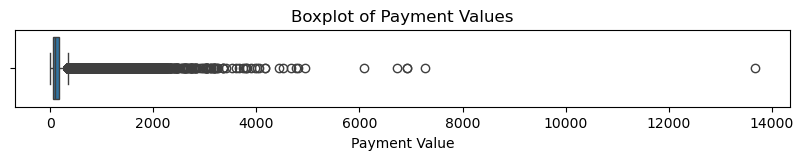

In [750]:
## box plot to understand the distribution of payment value
# Create a boxplot using Seaborn
plt.figure(figsize=(10,1))
sns.boxplot(x=df_order_payments['payment_value'])
plt.title("Boxplot of Payment Values")
plt.xlabel("Payment Value")
plt.show()


* most used payment type is credit card meaning most customers prefer shopping using credit card


In [752]:
## Descriptive Statistics for sellers dataset
df_sellers.describe(include = 'all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state_code,sellers_state
count,3095,3095.000000,3095,3095,3095
unique,3095,NaN,611,23,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP,Sao Paulo
freq,1,NaN,694,1849,1849
mean,NaN,32291.059451,NaN,NaN,NaN
std,NaN,32713.453830,NaN,NaN,NaN
min,NaN,1001.000000,NaN,NaN,NaN
25%,NaN,7093.500000,NaN,NaN,NaN
50%,NaN,14940.000000,NaN,NaN,NaN
75%,NaN,64552.500000,NaN,NaN,NaN


* Most sellers are from Sao Paulo previously we saw that most of the customers are from the state Sao Paulo


In [754]:
## Descriptive Statistics for products dataset
products.describe(include = 'all')

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32951,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000,32328
unique,32951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728,NaN
std,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047,NaN
min,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,NaN


In [756]:
## Descriptive Statistics for sellers dataset
df_sellers.describe(include = 'all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state_code,sellers_state
count,3095,3095.000000,3095,3095,3095
unique,3095,NaN,611,23,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP,Sao Paulo
freq,1,NaN,694,1849,1849
mean,NaN,32291.059451,NaN,NaN,NaN
std,NaN,32713.453830,NaN,NaN,NaN
min,NaN,1001.000000,NaN,NaN,NaN
25%,NaN,7093.500000,NaN,NaN,NaN
50%,NaN,14940.000000,NaN,NaN,NaN
75%,NaN,64552.500000,NaN,NaN,NaN


* The Data is clean now and free from errors 

In [639]:
## saving clean dataset for further analysis
df_customers.to_csv('D:\\Career\\Data_Analytics\\DA_Projects\\E_Commerce_Datasets\\clean_olit_customer.csv',index = False)
df_orders.to_csv('D:\\Career\\Data_Analytics\\DA_Projects\\E_Commerce_Datasets\\clean_olist_orders.csv',index = False)
df_order_items.to_csv('D:\\Career\\Data_Analytics\\DA_Projects\\E_Commerce_Datasets\\clean_olist_order_items.csv',index = False)
products.to_csv('D:\\Career\\Data_Analytics\\DA_Projects\\E_Commerce_Datasets\\clean_olist_products.csv',index = False)
df_sellers.to_csv('D:\\Career\\Data_Analytics\\DA_Projects\\E_Commerce_Datasets\\clean_olist_sellers.csv',index = False)
df_geolocation.to_csv('D:\\Career\\Data_Analytics\\DA_Projects\\E_Commerce_Datasets\\clean_olist_geolocation.csv',index = False)
df_order_payments.to_csv('D:\\Career\\Data_Analytics\\DA_Projects\\E_Commerce_Datasets\\clean_olist_order_payments.csv',index = False)
df_reviews.to_csv('D:\\Career\\Data_Analytics\\DA_Projects\\E_Commerce_Datasets\\clean_olist_reviews.csv',index = False)
